In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
data = np.load('surface_friction_sweep.npz')
thetas = data['thetas']
phis = data['phis']
mu = data['mu']
Fn = data['Fn']
Ft = data['Ft']

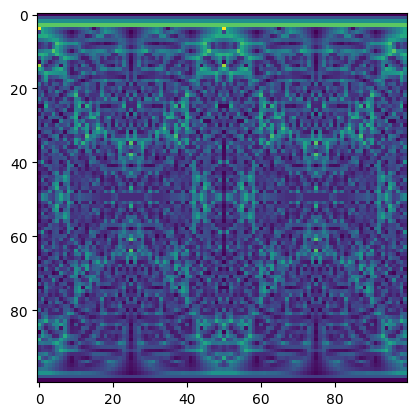

In [73]:
plt.imshow(mu)

0.046374917663334056


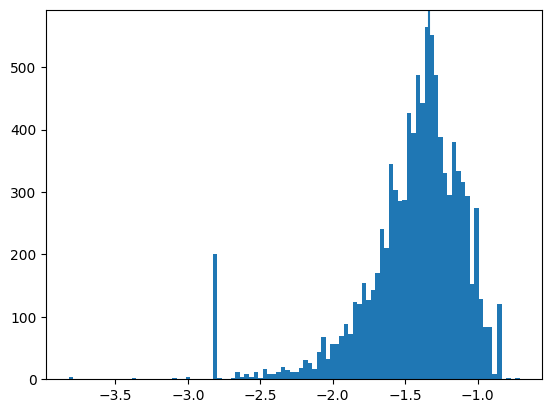

In [75]:
f = mu.flatten()
plt.hist(np.log10(f[f > 0]), bins=100)
plt.axvline(np.log10(np.mean(f)))
print(np.mean(f))

In [76]:
# Wrap φ by duplicating the first column at φ=2π
phis_w = np.concatenate([phis, phis[:1] + 2*np.pi])
mu_w   = np.concatenate([mu, mu[:, :1]], axis=1)   # (n_theta, n_phi+1)

TH, PH = np.meshgrid(thetas, phis_w, indexing="ij")  # matches mu_w shape

X = np.sin(TH) * np.cos(PH)
Y = np.sin(TH) * np.sin(PH)
Z = np.cos(TH)

fig = go.Figure(
    go.Surface(
        x=X, y=Y, z=Z,
        surfacecolor=mu_w,
        colorscale="Viridis",
        colorbar=dict(title="μ"),
    )
)
fig.update_layout(scene=dict(aspectmode="data"), title="μ(θ, φ) on the unit sphere")
fig.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

data = np.load('test.npz')
thetas = data['thetas']
phis = data['phis']
mu = data['mu']
Fn = data['Fn']
Ft = data['Ft']

# 2d map
plt.imshow(mu)
plt.show()

# histogram
f = mu.flatten()
plt.hist(np.log10(f[f > 0]), bins=100)
plt.axvline(np.log10(np.mean(f)))
plt.show()

# sphere wrapped map
phis_w = np.concatenate([phis, phis[:1] + 2*np.pi])
mu_w   = np.concatenate([mu, mu[:, :1]], axis=1)   # (n_theta, n_phi+1)

TH, PH = np.meshgrid(thetas, phis_w, indexing="ij")  # matches mu_w shape

X = np.sin(TH) * np.cos(PH)
Y = np.sin(TH) * np.sin(PH)
Z = np.cos(TH)

fig = go.Figure(
    go.Surface(
        x=X, y=Y, z=Z,
        surfacecolor=mu_w,
        colorscale="Viridis",
        colorbar=dict(title="μ"),
    )
)
fig.update_layout(scene=dict(aspectmode="data"), title="μ(θ, φ) on the unit sphere")
fig.show()